# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [18]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [19]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [20]:
use_adj = True

Define high low trade periods

In [21]:
sma_period = 200
percent_band = 3.5

#sma_period = 225
#percent_band = 3.0

Run Strategy

In [22]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [23]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [24]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
19,1998-11-04,1118.67,1999-10-15,1247.41,128.74,20340.92,158,187440.41,LONG,^GSPC
20,1999-10-29,1362.93,2000-10-10,1387.02,24.09,3468.96,144,190909.37,LONG,^GSPC
21,2003-04-22,911.37,2004-08-06,1063.97,152.60,33571.99,220,224481.36,LONG,^GSPC
22,2004-11-04,1161.67,2007-11-21,1416.77,255.10,51275.10,201,275756.46,LONG,^GSPC
23,2009-06-12,946.21,2010-06-04,1064.88,118.67,35838.33,302,311594.79,LONG,^GSPC
24,2010-10-05,1160.75,2011-08-04,1200.07,39.32,10891.63,277,322486.42,LONG,^GSPC
25,2012-01-18,1308.04,2015-08-21,1970.89,662.85,168363.89,254,490850.31,LONG,^GSPC
26,2016-04-18,2094.34,2018-10-24,2656.10,561.76,134260.64,239,625110.95,LONG,^GSPC
27,2019-03-21,2854.88,2020-03-09,2746.56,-108.32,-24047.00,222,601063.95,LONG,^GSPC
28,2020-06-03,3122.87,2020-07-15,3226.56,103.69,20219.54,195,621283.49,LONG,^GSPC


In [25]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-09,622161.39,609665.77,616754.04,195,2104.28,1.00,-
2020-07-10,623534.19,613667.17,623187.09,195,2104.28,1.00,-
2020-07-13,632991.69,616243.12,617372.17,195,2104.28,1.00,-
2020-07-14,626289.52,611997.96,625620.68,195,2104.28,1.00,-
2020-07-15,631283.49,631283.49,631283.49,0,631283.49,0.00,X


Generate strategy stats - display all available stats

In [26]:
pf.print_full(stats)

start                                                   1957-03-04
end                                                     2020-07-15
beginning_balance                                            10000
ending_balance                                           631283.49
total_net_profit                                         621283.49
gross_profit                                             652647.81
gross_loss                                               -31364.32
profit_factor                                                20.81
return_on_initial_capital                                  6212.83
annual_return_rate                                            6.76
trading_period                           63 years 4 months 11 days
pct_time_in_market                                           69.70
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [27]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1957-03-04 00:00:00 BUY  226 ^GSPC @ 44.06
2020-07-15 00:00:00 SELL 226 ^GSPC @ 3226.56


Plot Equity Curves: Strategy vs Benchmark

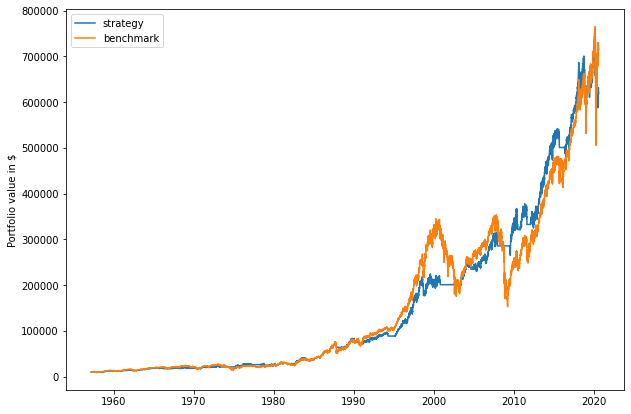

In [28]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

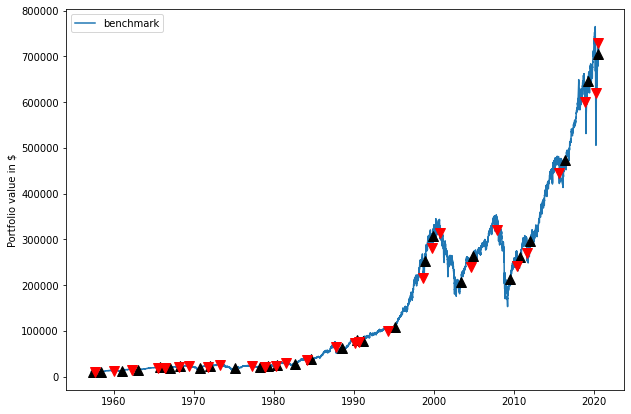

In [29]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

In [30]:
print('trading period:  {} to {}'.format(stats['start'], stats['end']))
df = pf.summary(stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1957-03-04 to 2020-07-15


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$631,283.49","$729,245.01"
total_net_profit,"$621,283.49","$719,245.01"
gross_profit,"$652,647.81","$719,245.01"
gross_loss,"-$31,364.32",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.76,7.00
max_closed_out_drawdown,-21.98,-56.77
drawdown_annualized_return,-3.25,-8.11
drawdown_recovery,-0.31,-1.42
best_month,14.94,23.49
worst_month,-18.86,-30.94
sharpe_ratio,0.67,0.50
sortino_ratio,0.75,0.64
monthly_std,2.95,4.28


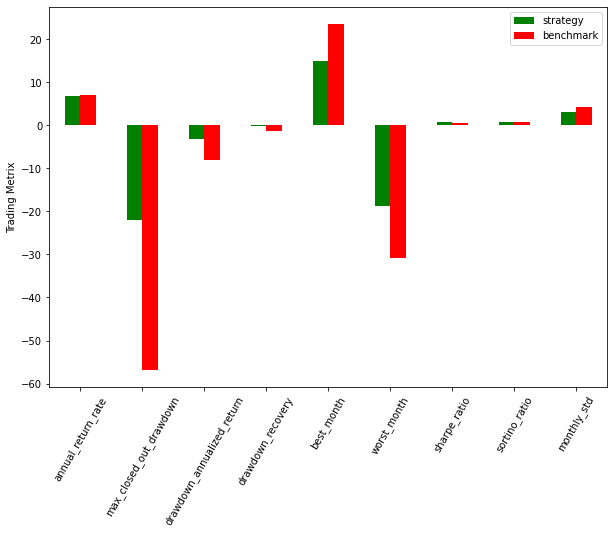

In [31]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Print the raw transaction log

In [32]:
pd.set_option('display.max_rows', len(rlog))
rlog

,date,price,shares,entry_exit,direction,symbol
0,1957-05-31,47.43,210,entry,LONG,^GSPC
1,1957-08-26,43.89,210,exit,LONG,^GSPC
2,1958-05-06,44.01,210,entry,LONG,^GSPC
3,1960-01-29,55.61,210,exit,LONG,^GSPC
4,1960-12-28,57.78,202,entry,LONG,^GSPC
5,1962-04-27,66.30,202,exit,LONG,^GSPC
6,1962-12-20,62.82,213,entry,LONG,^GSPC
7,1965-06-25,83.06,213,exit,LONG,^GSPC
8,1965-09-15,89.52,197,entry,LONG,^GSPC
9,1966-05-09,86.32,197,exit,LONG,^GSPC
